In [2]:
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")
columns = ["sentiment", "id", "date", "query", "user_id", "text"]
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/training.1600000.processed.noemoticon.csv", encoding="latin",names=columns)

df.head()

#replace 4 to 1 to indicate positive label
df["sentiment"] = df["sentiment"].replace(4,1)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After loading the dataset, we will examine the dataset and check if we have equal rows of data for both the
positive and the negative tweets. For this purpose, we will use the countplot from seaborn library.

This code uses the seaborn library to create a countplot of the "sentiment" column in a DataFrame called "df". The countplot shows the number of occurrences of each value in the "sentiment" column. The "x" parameter specifies the column to be plotted.

<AxesSubplot:xlabel='sentiment', ylabel='count'>

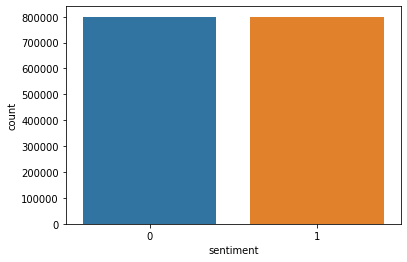

In [3]:
# plotting the data using countplot
sns.countplot(x="sentiment",data=df)

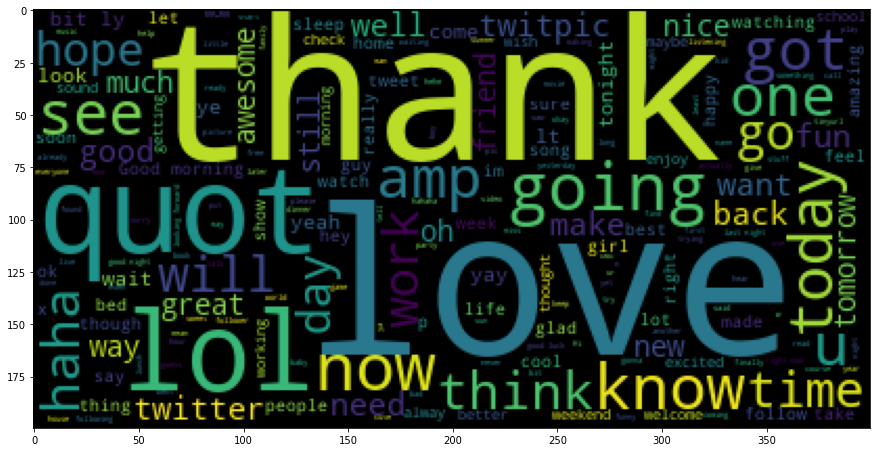

In [4]:
#creating a string of positive tweets to analyze the words
positive_tweets = df[df['sentiment'] == 1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

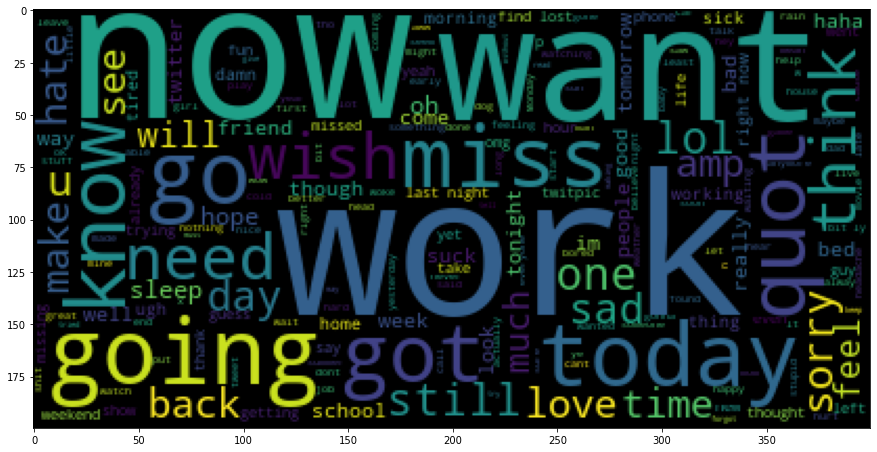

In [5]:
# creating the string of negative tweets to analyze the words
negative_tweets = df[df['sentiment'] == 0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].sample(10000)

count_vect=CountVectorizer()
count_matrix=count_vect.fit_transform(df['text'])
count_array=count_matrix.toarray()
print(count_vect.get_feature_names())
print(count_array)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

def calculateAccuracy(cmat):
  print(cmat)
  truth=sum(cmat[i][i] for i in range(len(cmat)))
  total=0
  for row in cmat:
    for elem in row:
      total+=elem
  return truth/total

def multinomialNBModeling(x_train, x_test, y_train, y_test):
  multinomial_model=MultinomialNB(alpha=0.01)
  multinomial_model.fit(x_train,y_train)
  y_pred=multinomial_model.predict(x_test)

  mat1=confusion_matrix(y_pred,y_test)
  print("multinomial NB accuracy : ",calculateAccuracy(mat1))

def dtModeling(x_train, x_test, y_train, y_test):
  new_model=DecisionTreeClassifier(random_state=0)
  new_model.fit(x_train,y_train)
  y_pred=new_model.predict(x_test)
  cmat=confusion_matrix(y_pred,y_test)
  print("decision tree model accuracy : ",calculateAccuracy(cmat))
  

columns = ["sentiment", "id", "date", "query", "user_id", "text"]
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/training.1600000.processed.noemoticon.csv", encoding="latin",names=columns)
df.head()
df["sentiment"] = df["sentiment"].replace(4,1)

back=df.iloc[-10000:]
front=df.iloc[:10000]
df = pd.concat([front,back])

count_vect=CountVectorizer()
count_matrix=count_vect.fit_transform(df['text'])
sns.countplot(x="sentiment",data=df)

x=count_matrix
y=df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.10, random_state =26105111)


multinomialNBModeling(x_train, x_test, y_train, y_test)
dtModeling(x_train, x_test, y_train, y_test)
